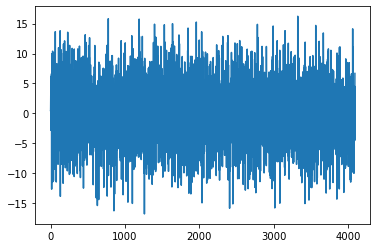

In [1]:
import numpy as np
import torch
from torch.autograd import Variable
from torch.nn.functional import conv1d,conv_transpose1d

from scipy import fft, fftpack

import matplotlib.pyplot as plt

%matplotlib inline

# Creating filters

d = 4096 # size of windows

def create_filters(d):
    x = np.arange(0, d, 1)
    wsin = np.empty((d,1,d), dtype=np.float32)
    wcos = np.empty((d,1,d), dtype=np.float32)
    window_mask = 1.0-1.0*np.cos(x)
    for ind in range(d):
        wsin[ind,0,:] = np.sin(2*np.pi*((ind+1)/d)*x)
        wcos[ind,0,:] = np.cos(2*np.pi*((ind+1)/d)*x)

    return wsin,wcos

wsin, wcos = create_filters(d)
wsin_var = Variable(torch.from_numpy(wsin), requires_grad=False)
wcos_var = Variable(torch.from_numpy(wcos),requires_grad=False)

# Creating signal

t = np.linspace(0,1,4096)
x = np.sin(2*np.pi*100*t)+np.sin(2*np.pi*200*t)+np.random.normal(scale=5,size=(4096))

plt.plot(x) 

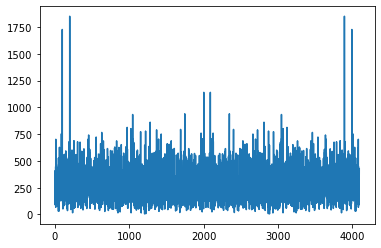

In [2]:
signal_input = torch.from_numpy(x.reshape(1,-1),)[:,None,:4096]

signal_input = signal_input.float()

zx = conv1d(signal_input, wsin_var, stride=1).pow(2)+conv1d(signal_input, wcos_var, stride=1).pow(2)
zx= zx.flatten().abs()**0.5
plt.plot(zx)